# Time series of spring phytoplankton bloom and model forcing at station S3 from Feb 15th - June 15th 2015

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, places, viz_tools, visualisations
import xarray as xr
import pandas as pd

%matplotlib inline

### Location of station S3

(-125.0, -122.0)

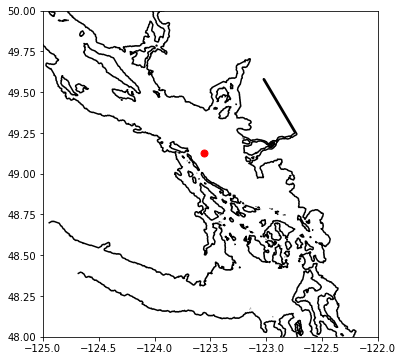

In [2]:
lon,lat=places.PLACES['S3']['lon lat']
fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords ='map', isobath=.1)
ax.plot(lon, lat, '.', markersize=14, color='red')
ax.set_ylim(48,50)
ax.set_xlim(-125,-122)

### Total surface phytoplankton and nitrate:

In [3]:
basedir='/results/SalishSea/nowcast-green.201812/'

start=dt.datetime(2015,2,15)
end=dt.datetime(2015,6,15)
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'ptrc_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution  
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
# a list of the files we want between start and end date
print(flist)

                                                 paths        t_0        t_n
0    /results/SalishSea/nowcast-green.201812/15feb1... 2015-02-15 2015-02-16
1    /results/SalishSea/nowcast-green.201812/16feb1... 2015-02-16 2015-02-17
2    /results/SalishSea/nowcast-green.201812/17feb1... 2015-02-17 2015-02-18
3    /results/SalishSea/nowcast-green.201812/18feb1... 2015-02-18 2015-02-19
4    /results/SalishSea/nowcast-green.201812/19feb1... 2015-02-19 2015-02-20
..                                                 ...        ...        ...
116  /results/SalishSea/nowcast-green.201812/11jun1... 2015-06-11 2015-06-12
117  /results/SalishSea/nowcast-green.201812/12jun1... 2015-06-12 2015-06-13
118  /results/SalishSea/nowcast-green.201812/13jun1... 2015-06-13 2015-06-14
119  /results/SalishSea/nowcast-green.201812/14jun1... 2015-06-14 2015-06-15
120  /results/SalishSea/nowcast-green.201812/15jun1... 2015-06-15 2015-06-16

[121 rows x 3 columns]


In [4]:
bio=xr.open_mfdataset(flist['paths'])
ij,ii=places.PLACES['S3']['NEMO grid ji']
ik=0 # choose surface level
bio

<xarray.Dataset>
Dimensions:                       (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 121, x: 398, y: 898)
Coordinates:
    nav_lat                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered                 (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                  (time_counter) datetime64[ns] 2015-02-15T12...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                          (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds                 (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    nitrate                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds          (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds           (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    ammonium                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    silicon                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    diatoms                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    flagellates                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    ciliates                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    microzooplankton              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    biogenic_silicon              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    Fraser_tracer                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    mesozooplankton               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20150211_20150220
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2018-Dec-29 01:01:11 GMT
    uuid:         41106021-80cb-4c0b-896a-6768f0405b52

Text(0.5, 1.0, 'Surface Phytoplankton and Nitrate at Station S3')

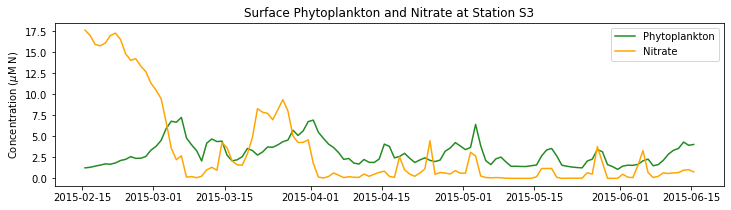

In [5]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
p1=ax.plot(bio.time_centered,bio.diatoms.isel(deptht=ik,y=ij,x=ii)+\
        bio.flagellates.isel(deptht=ik,y=ij,x=ii)+bio.ciliates.isel(deptht=ik,y=ij,x=ii),
           '-',color='forestgreen',label='Phytoplankton')
p2=ax.plot(bio.time_centered,bio.nitrate.isel(deptht=ik,y=ij,x=ii),
           '-',color='orange',label='Nitrate')
ax.legend(handles=[p1[0],p2[0]],loc=1)
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_title('Surface Phytoplankton and Nitrate at Station S3')

### Fraction of surface phytoplankton that is diatoms

In [6]:
# Surface phytoplankton
sdiat=bio.diatoms.isel(deptht=ik,y=ij,x=ii)
sflag=bio.flagellates.isel(deptht=ik,y=ij,x=ii)
scili=bio.ciliates.isel(deptht=ik,y=ij,x=ii)
sphyto=sdiat+sflag+scili
percdiat=sdiat/sphyto # percent diatoms

(0.0, 1.0)

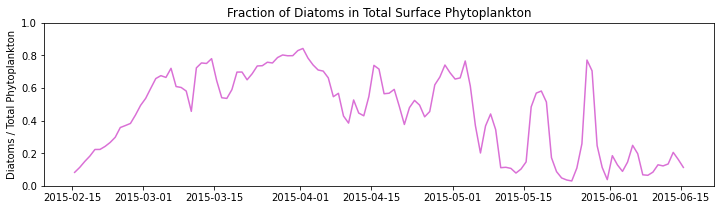

In [7]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(bio.time_centered,percdiat, '-',color='orchid')
ax.set_ylabel('Diatoms / Total Phytoplankton')
ax.set_title('Fraction of Diatoms in Total Surface Phytoplankton')
ax.set_ylim(0,1)

### Depth integrated phytoplankton:

In [8]:
fliste3t = et.index_model_files(start,end,basedir,nam_fmt,flen,"carp_T",tres)
carp = xr.open_mfdataset(fliste3t['paths'])
carp

<xarray.Dataset>
Dimensions:                     (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 121, x: 398, y: 898)
Coordinates:
    nav_lat                     (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                     (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                (time_counter) datetime64[ns] 2015-02-15T12:0...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon                  (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat                  (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                        (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds               (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    PAR                         (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    sigma_theta                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    e3t                         (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20150211_20150220
    description:  auxilary variables
    title:        auxilary variables
    Conventions:  CF-1.6
    timeStamp:    2018-Dec-29 01:00:04 GMT
    uuid:         f3ecc007-0a28-46b6-b10b-61141f8fbcc1

In [9]:
%%time
tt=bio.time_centered  # time
# you have to specify the name of the dimension,but you can put it in whatever order you want
    # isel lets you select parts of model output by index 
    # (in this case, ii, ij), as opposed to value
diat=bio.diatoms.isel(y=ij,x=ii)
flag=bio.flagellates.isel(y=ij,x=ii)
cili=bio.ciliates.isel(y=ij,x=ii)
phyto=diat+flag+cili

e3t=carp.e3t.isel(y=ij,x=ii)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 12.5 ms


In [10]:
intphyto=np.sum(phyto*e3t,1) # depth integrated phytoplankton

CPU times: user 1min 48s, sys: 15.6 s, total: 2min 4s
Wall time: 2min 54s


Text(0.5, 1.0, 'Depth Integrated Phytoplankton Concentration')

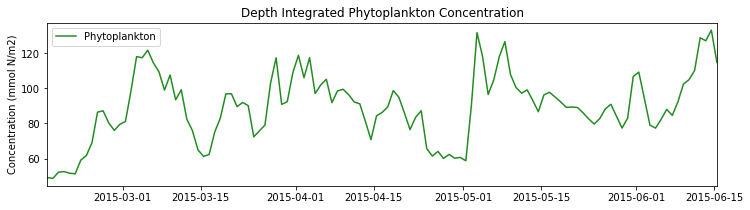

In [11]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,intphyto,'-',color='forestgreen',label='Phytoplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration (mmol N/m2)')
ax.set_xlim(tt[0],tt[-1])
ax.set_title('Depth Integrated Phytoplankton Concentration')

### Fraction of depth integrated phytoplankton that is diatoms

In [12]:
intdiat=np.sum(diat*e3t,1) # depth integrated diatom
fracdiat=intdiat/intphyto # depth integrated fraction of diatoms

CPU times: user 1min 47s, sys: 16 s, total: 2min 3s
Wall time: 2min 53s


(0.0, 1.0)

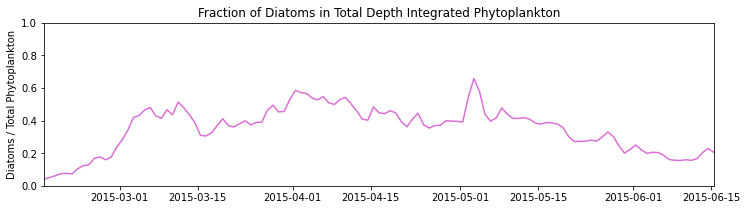

In [13]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,fracdiat,'-',color='orchid')
ax.set_ylabel('Diatoms / Total Phytoplankton')
ax.set_xlim(tt[0],tt[-1])
ax.set_title('Fraction of Diatoms in Total Depth Integrated Phytoplankton')
ax.set_ylim(0,1)

### Fraser River Flow

In [5]:
# reading Fraser river flow files
dfFra=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/Flow/FraserHopeDaily__Dec-2-2020_10_31_05PM.csv',
                  skiprows=1)
# the original file contains both flow and water level information in the same field (Value)
# keep only the flow data, where PARAM=1 (drop PARAM=2 values, water level data)
# flow units are m3/s
# DD is YD, year day (ie. 1 is jan 1)
dfFra.drop(dfFra.loc[dfFra.PARAM==2].index,inplace=True)  

In [6]:
# rename 'Value' column to 'Flow' now that we have removed all the water level rows
dfFra.rename(columns={'Value':'Flow'}, inplace=True) 
    # inplace=True does this function on the orginal dataframe
dfFra

,ID,PARAM,YEAR,DD,Flow,SYM
0,08MF005,1,1912,61,538.0,NaN
1,08MF005,1,1912,62,538.0,NaN
2,08MF005,1,1912,63,538.0,NaN
3,08MF005,1,1912,64,538.0,NaN
4,08MF005,1,1912,65,538.0,NaN
...,...,...,...,...,...,...
39016,08MF005,1,2018,360,1090.0,NaN
39017,08MF005,1,2018,361,1050.0,NaN
39018,08MF005,1,2018,362,1030.0,NaN
39019,08MF005,1,2018,363,1120.0,NaN


In [7]:
# no time information so use dt.date
dfFra['Date']=[dt.date(iyr,1,1)+dt.timedelta(days=idd-1) for iyr, idd in zip(dfFra['YEAR'],dfFra['DD'])]
# taking the value from the yr column, jan1st date, and making jan1 column to be 1 not 0
dfFra.head(2)

,ID,PARAM,YEAR,DD,Flow,SYM,Date
0,08MF005,1,1912,61,538.0,NaN,1912-03-01
1,08MF005,1,1912,62,538.0,NaN,1912-03-02


In [8]:
# select portion of dataframe in desired date range
dfFra2=dfFra.loc[(dfFra.Date>=start.date())&(dfFra.Date<=end.date())]
# could also write dfFra['Date'], sometimes this is required
# newstart is a datetime object, so we convert it to just a date with .date

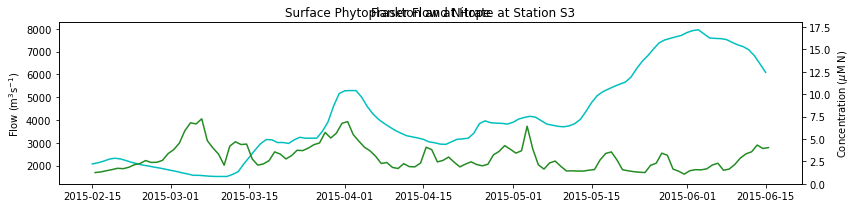

In [11]:
fig,ax1=plt.subplots(1,1,figsize=(12,3))
ax1.plot(dfFra2['Date'],dfFra2['Flow'],'c-')
ax1.set_ylabel('Flow (m$^3$s$^{-1}$)')
ax1.set_title('Fraser Flow at Hope')

# plot phytoplankton on top:
ax2=ax1.twinx()
ax2.plot(bio.time_centered,bio.diatoms.isel(deptht=ik,y=ij,x=ii)+\
        bio.flagellates.isel(deptht=ik,y=ij,x=ii)+bio.ciliates.isel(deptht=ik,y=ij,x=ii),
           '-',color='forestgreen',label='Phytoplankton')
#p2=ax2.plot(bio.time_centered,bio.nitrate.isel(deptht=ik,y=ij,x=ii),
         #  '-',color='orange',label='Nitrate')
#ax2.legend(handles=[p1[0],p2[0]],loc=1)
ax2.set_ylabel('Concentration ($\mu$M N)')
ax2.set_ylim(0,18)
#ax2.set_title('Surface Phytoplankton and Nitrate at Station S3')
fig.tight_layout()
plt.show()

### Forcing (ops): Wind Speed

In [10]:
opsdir='/results/forcing/atmospheric/GEM2.5/operational'

In [11]:
flist2=et.index_model_files(start,end,opsdir,nam_fmt='ops',flen=1,ftype='None',tres=24)
flist2

,paths,t_0,t_n
0,/results/forcing/atmospheric/GEM2.5/operationa...,2015-02-15,2015-02-16
1,/results/forcing/atmospheric/GEM2.5/operationa...,2015-02-16,2015-02-17
2,/results/forcing/atmospheric/GEM2.5/operationa...,2015-02-17,2015-02-18
3,/results/forcing/atmospheric/GEM2.5/operationa...,2015-02-18,2015-02-19
4,/results/forcing/atmospheric/GEM2.5/operationa...,2015-02-19,2015-02-20
...,...,...,...
116,/results/forcing/atmospheric/GEM2.5/operationa...,2015-06-11,2015-06-12
117,/results/forcing/atmospheric/GEM2.5/operationa...,2015-06-12,2015-06-13
118,/results/forcing/atmospheric/GEM2.5/operationa...,2015-06-13,2015-06-14
119,/results/forcing/atmospheric/GEM2.5/operationa...,2015-06-14,2015-06-15


In [12]:
winds=xr.open_mfdataset(flist2['paths'])
winds

<xarray.Dataset>
Dimensions:       (time_counter: 2904, x: 256, y: 266)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2015-02-15 ... 2015-06-15T23:...
  * x             (x) float64 0.0 2.5e+03 5e+03 ... 6.325e+05 6.35e+05 6.375e+05
  * y             (y) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
Data variables:
    atmpres       (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    nav_lat       (time_counter, y, x) float64 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    nav_lon       (time_counter, y, x) float64 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    precip        (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    qair          (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    solar         (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    tair          (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    therm_rad     (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    u_wind        (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    v_wind        (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
Attributes:
    Conventions:          CF-1.0
    GRIB2_grid_template:  20
    NCO:                  4.4.2
    History:              Thu Dec 31 12:23:10 2015: ncatted -O -a time_origin...

In [13]:
jw,iw=places.PLACES['S3']['GEM2.5 grid ji']
# GEM2.5 grid ji is atm forcing grid for ops files

In [14]:
# grab interesting values:
u_wind=winds.u_wind.isel(y=jw,x=iw)
v_wind=winds.v_wind.isel(y=jw,x=iw)
tt=winds.time_counter

Text(0, 0.5, 'm/s')

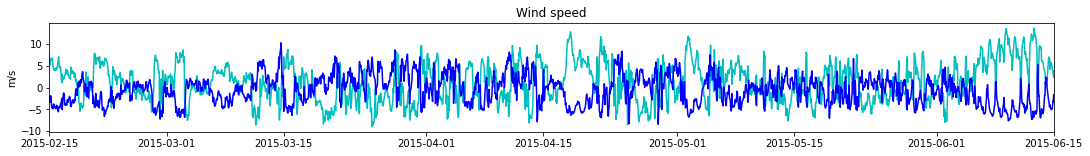

In [15]:
fig,ax=plt.subplots(1,1,figsize=(18,2))
ax.plot(tt,u_wind,'c-')
ax.plot(tt,v_wind,'b-')
ax.set_xlim(start,end)
ax.set_title('Wind speed')
ax.set_ylabel('m/s')

In [16]:
# wind speed:
wspeed=np.sqrt(u_wind**2 + v_wind**2)

In [17]:
# wind direction in degrees from east
d = np.arctan2(v_wind, u_wind)
winddirec=np.rad2deg(d + (d < 0)*2*np.pi)

Text(0.5, 1.0, 'Wind direction in degrees from east (left to right) ')

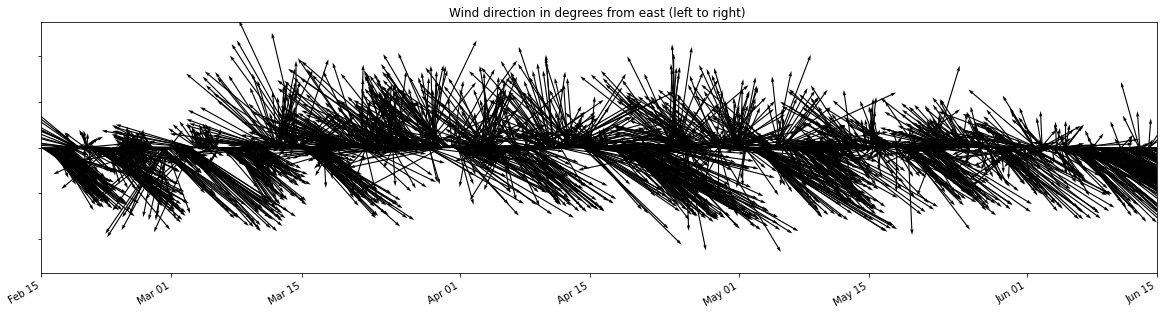

In [18]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
q=ax.quiver(tt, np.zeros(len(tt)), u_wind, v_wind,scale=9*10e0, width=0.001); # change the scale
ax.set_yticklabels([]);
fig.autofmt_xdate(bottom=0.3, rotation=30, ha='right')
yearsFmt = mdates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim(start,end)
ax.set_title('Wind direction in degrees from east (left to right) ')
# this can probably be done better?

### Daily average wind speed

In [19]:
# calculate daily average wind speed:
ttday=tt[12::24] # start at 12th value and take every 24th
wsdaily=list()
for ii in range(0,int(len(wspeed)/24)):
    wsdaily.append(np.mean(wspeed[(ii*24):((ii+1)*24)]))
wsdaily=np.array(wsdaily) # convert to numpy array from list to be able to plot

Text(0, 0.5, 'm/s')

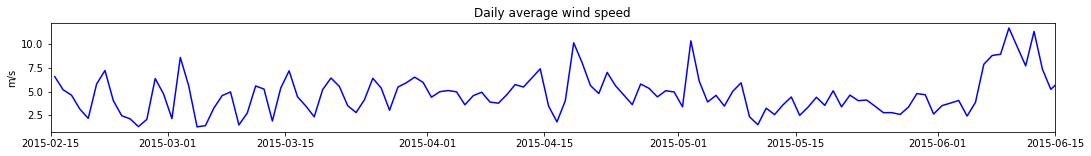

In [22]:
fig,ax=plt.subplots(1,1,figsize=(18,2))
ax.plot(ttday,wsdaily,'b-')
ax.set_xlim(start,end)
ax.set_title('Daily average wind speed')
ax.set_ylabel('m/s')

### Daily average wind speed cubed

Text(0, 0.5, '$\\mathregular{m^3}$/$\\mathregular{s^3}$')

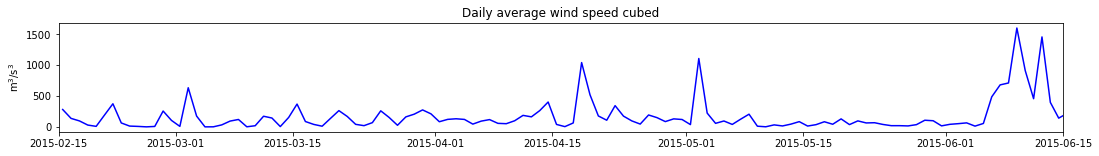

In [24]:
wscubed=wsdaily**3
fig,ax1=plt.subplots(1,1,figsize=(18,2))
ax1.plot(ttday,wscubed,'b-')
ax1.set_xlim(start,end)
ax1.set_title('Daily average wind speed cubed')
ax1.set_ylabel('$\mathregular{m^3}$/$\mathregular{s^3}$')
ax2=ax1.twinx()
ax2.plot(bio.time_centered,bio.diatoms.isel(deptht=ik,y=ij,x=ii)+\
        bio.flagellates.isel(deptht=ik,y=ij,x=ii)+bio.ciliates.isel(deptht=ik,y=ij,x=ii),
           '-',color='forestgreen',label='Phytoplankton')
#p2=ax2.plot(bio.time_centered,bio.nitrate.isel(deptht=ik,y=ij,x=ii),
         #  '-',color='orange',label='Nitrate')
ax2.legend(handles=[p1[0],p2[0]],loc=1)
ax2.set_ylabel('Concentration ($\mu$M N)')
ax2.set_ylim(0,18)
#ax2.set_title('Surface Phytoplankton and Nitrate at Station S3')
fig.tight_layout()
plt.show()

### Photosynthetically Available Radiation (PAR) at Surface

Text(0.5, 1.0, 'Modeled PAR Reaching Surface at Station S3')

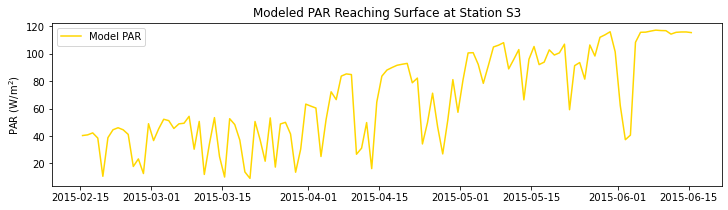

In [27]:
fig,ax1=plt.subplots(1,1,figsize=(12,3))
ax1.plot(carp.time_centered,carp.PAR.isel(deptht=ik,y=ij,x=ii),
           '-',color='gold',label='Model PAR')
ax1.legend(loc=2)
ax1.set_ylabel('PAR (W/$\mathregular{m^2}$)') # say its model PAR
ax1.set_title('Modeled PAR Reaching Surface at Station S3')

ax2=ax1.twinx()
ax2.plot(bio.time_centered,bio.diatoms.isel(deptht=ik,y=ij,x=ii)+\
        bio.flagellates.isel(deptht=ik,y=ij,x=ii)+bio.ciliates.isel(deptht=ik,y=ij,x=ii),
           '-',color='forestgreen',label='Phytoplankton')
#p2=ax2.plot(bio.time_centered,bio.nitrate.isel(deptht=ik,y=ij,x=ii),
         #  '-',color='orange',label='Nitrate')
ax2.legend(handles=[p1[0],p2[0]],loc=1)
ax2.set_ylabel('Concentration ($\mu$M N)')
ax2.set_ylim(0,18)
#ax2.set_title('Surface Phytoplankton and Nitrate at Station S3')
fig.tight_layout()
plt.show()

### Forcing: Solar radiation

In [28]:
solar=winds.solar.isel(y=jw,x=iw)

Text(0, 0.5, 'W/$\\mathregular{m^2}$')

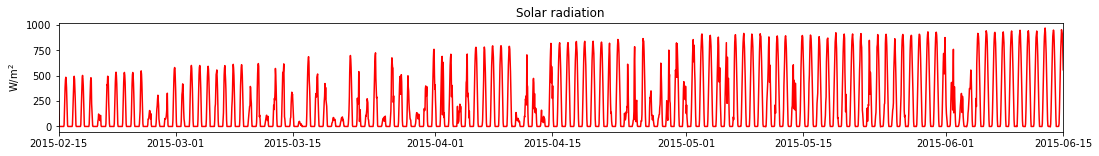

In [29]:
fig,ax=plt.subplots(1,1,figsize=(18,2))
ax.plot(tt,solar,'r-')
ax.set_xlim(start,end)
ax.set_title('Solar radiation')
ax.set_ylabel('W/$\mathregular{m^2}$')

In [30]:
# calculate daily average solar radiation:
ttday=tt[12::24] # start at 12th value and take every 24th
solardaily=list()
for ii in range(0,int(len(solar)/24)):
    solardaily.append(np.mean(solar[(ii*24):((ii+1)*24)]))
solardaily=np.array(solardaily) # convert to numpy array from list to be able to plot

Text(0, 0.5, 'W/$\\mathregular{m^2}$')

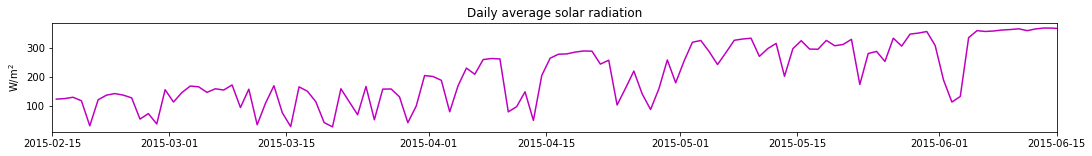

In [31]:
fig,ax1=plt.subplots(1,1,figsize=(18,2))
ax1.plot(ttday,solardaily,'m-')
ax1.set_xlim(start,end)
ax1.set_title('Daily average solar radiation')
ax1.set_ylabel('W/$\mathregular{m^2}$')

ax2=ax1.twinx()
ax2.plot(bio.time_centered,bio.diatoms.isel(deptht=ik,y=ij,x=ii)+\
        bio.flagellates.isel(deptht=ik,y=ij,x=ii)+bio.ciliates.isel(deptht=ik,y=ij,x=ii),
           '-',color='forestgreen',label='Phytoplankton')
#p2=ax2.plot(bio.time_centered,bio.nitrate.isel(deptht=ik,y=ij,x=ii),
         #  '-',color='orange',label='Nitrate')
ax2.legend(handles=[p1[0],p2[0]],loc=1)
ax2.set_ylabel('Concentration ($\mu$M N)')
ax2.set_ylim(0,18)
#ax2.set_title('Surface Phytoplankton and Nitrate at Station S3')
fig.tight_layout()
plt.show()

In [32]:
bio.close()
carp.close()
winds.close()